In [35]:
#Importamos librerias 
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn import metrics
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# cargamos el dataset y mostramos las 5 primeras filas



data = pd.read_csv("winequality-red.csv")
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
data.shape

(1599, 12)

In [23]:
#3 reconocemos el dataset y sus variables 
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [24]:
# revisamos si hay valores nulos 
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

no hay valores nulos 

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

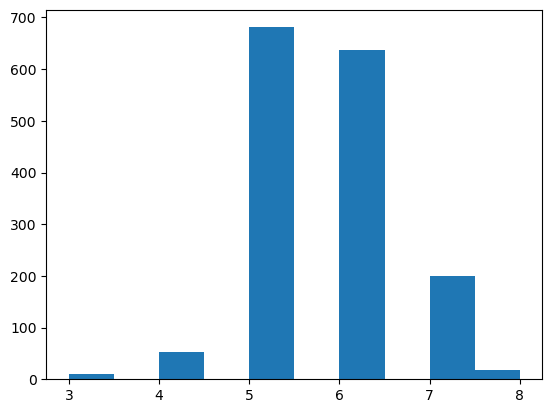

In [25]:
# analizar cuantos elementos hay de cada nivel de calidad
plt.hist(data.quality)

vemos que en el nivel 5 es nivel que mas registros presenta seguido de el nivel 6 que sobre pasan los 600 registros
el histograma muestra que el data set esta balanceado 

Text(0.5, 1.0, 'matriz de correlación')

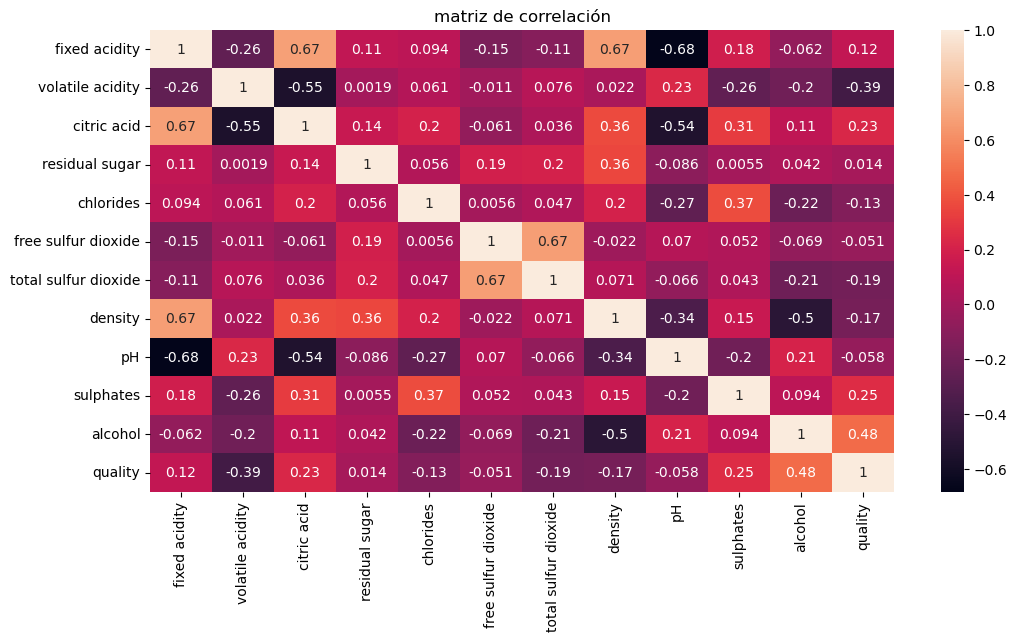

In [28]:
#  Análisis Exploratorio de Datos (EDA)

# Matriz de correlación
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot = True)
plt.title("matriz de correlación")



en la matriz de correlación vamos analizar que los valores mas cercanos a 1 es mayor su correlación y se observa que la densidad y acido fijo, acido citrico,  y el acohol con la calidad son los que mejor se correlacionan  

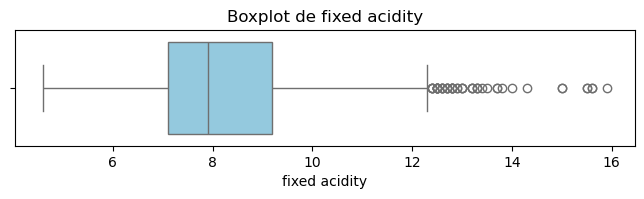

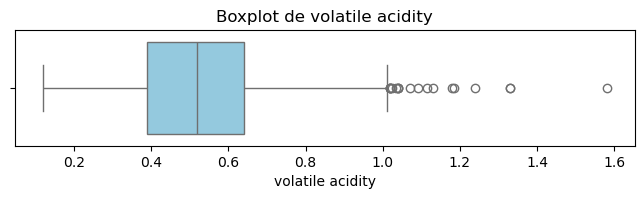

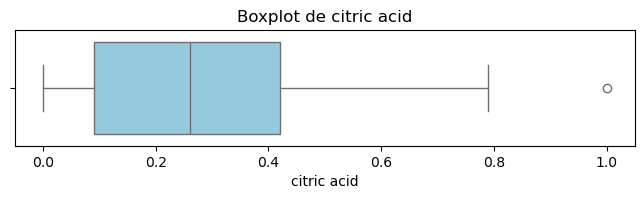

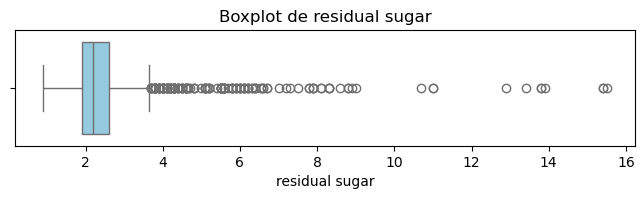

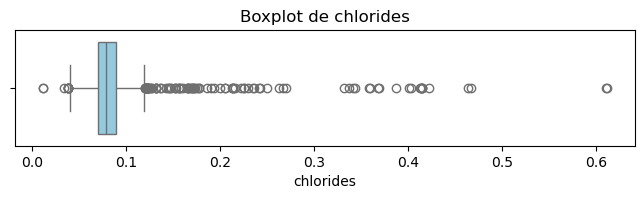

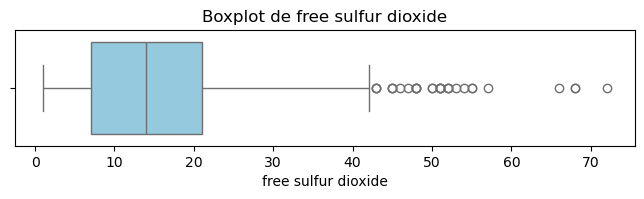

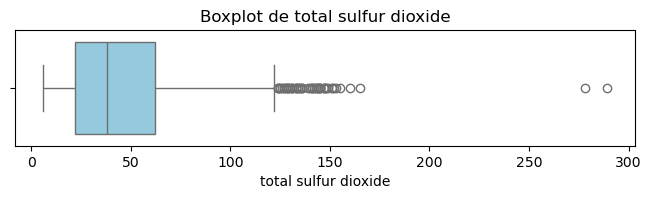

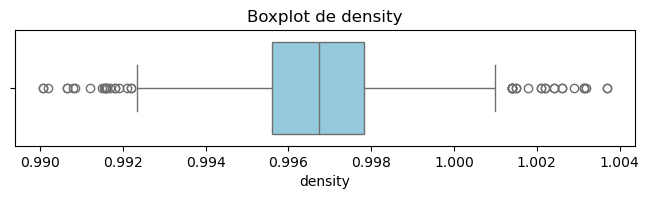

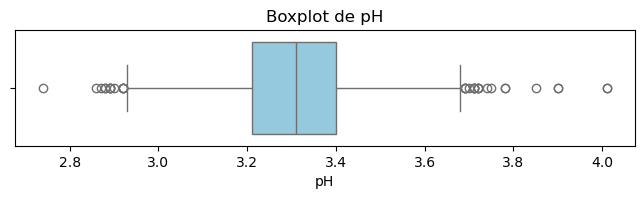

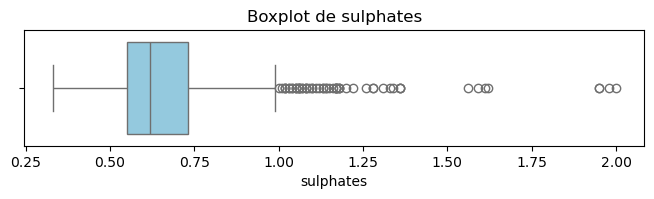

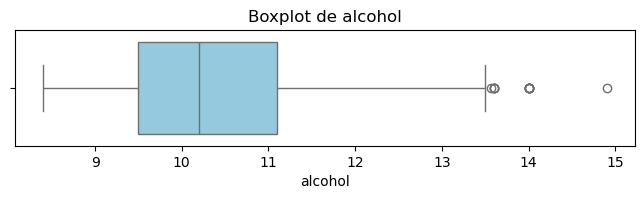

In [31]:
plt.show()

# Boxplots para valores atípicos
for col in data.columns[:-1]:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(data=data, x=col, color='skyblue')
    plt.title(f'Boxplot de {col}')
    plt.show()

Hay varias variables con valores atípicos (especialmente azúcar, cloruros, sulfitos, alcohol).



In [82]:
# Separar características X y variable objetivo y

predictors_col = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
       "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
       "pH", "sulphates", "alcohol"]
target_col = ["quality"]
predictors = data [predictors_col]
target = data [target_col]

se van a utilizar las variables que mas se correlacionan con la calidad que es nuestra caracteristica objetivo

In [83]:
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [84]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [85]:
# Dividir el dataset en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)


se divide el dataset en los datos de entrenamiento y los de prueba en un porcentaje de 80% para entrenamiento y 20% para prueba 

In [86]:
tree = DecisionTreeClassifier()


In [87]:
arbol = tree.fit(X_train, y_train)

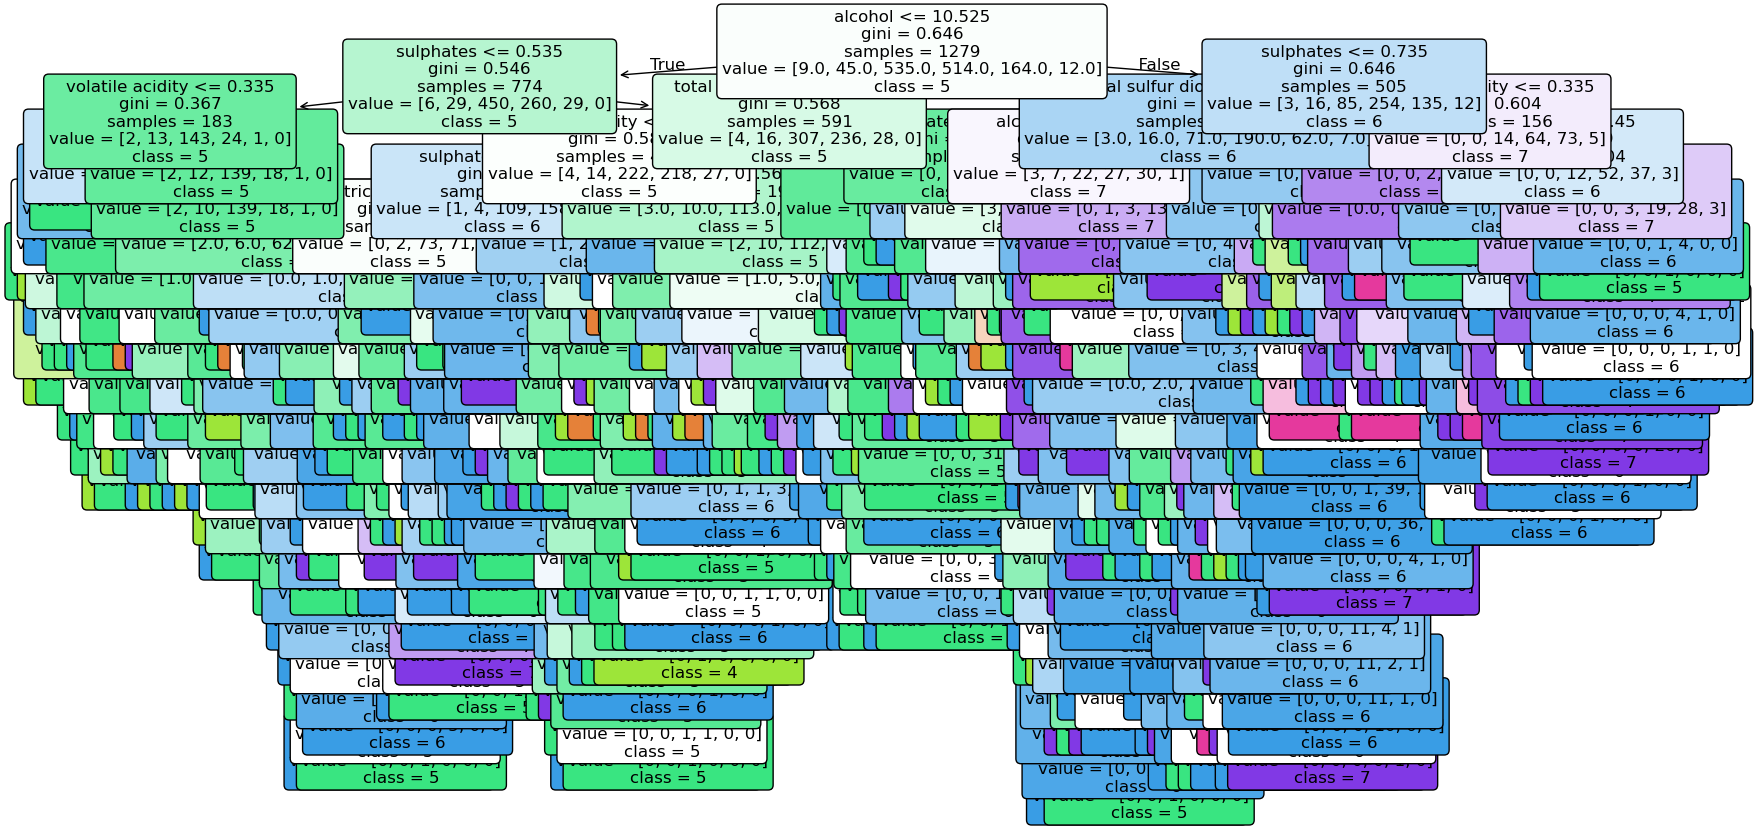

In [100]:
plt.figure(figsize=(20,10))  # Tamaño del gráfico
plot_tree(arbol, 
          feature_names=X_train.columns,     # nombres de las columnas
          class_names=[str(c) for c in arbol.classes_],  # clases en formato string
          filled=True,                       # colorear nodos por clase
          rounded=True,                      # bordes redondeados
          fontsize=12)                       # tamaño de fuente
plt.show()


se dibuja el árbol de decisión entrenado (arbol) usando la función plot_tree de Scikit-learn.

nos da una representación gráfica del modelo: cómo toma decisiones, qué condiciones usa, y cómo divide los datos.

In [94]:
predicciones = arbol.predict(X_test)

 el árbol de decisión ya entrenado (arbol) para hacer predicciones sobre los datos de prueba (X_test), y guarda esas predicciones en la variable predicciones

In [93]:
predicciones

array([7, 7, 5, 5, 6, 5, 5, 8, 5, 5, 5, 6, 5, 6, 7, 5, 6, 5, 5, 7, 5, 6,
       7, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 7, 5, 5, 6, 6,
       4, 5, 6, 5, 5, 6, 6, 4, 6, 5, 7, 5, 5, 6, 6, 5, 6, 5, 5, 5, 7, 7,
       6, 7, 5, 3, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 8, 6, 6, 5, 5, 5, 6, 5,
       7, 5, 6, 6, 5, 7, 5, 6, 5, 5, 6, 6, 5, 7, 6, 5, 6, 6, 6, 6, 5, 7,
       7, 7, 6, 6, 6, 5, 6, 7, 5, 5, 5, 4, 5, 6, 6, 6, 5, 5, 6, 7, 6, 5,
       6, 7, 5, 5, 7, 5, 6, 7, 5, 5, 5, 6, 6, 4, 6, 5, 6, 5, 5, 6, 5, 6,
       5, 5, 5, 5, 6, 5, 6, 5, 6, 4, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 7, 5, 6, 7,
       5, 5, 6, 6, 7, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 7, 5, 5, 5, 6, 7,
       5, 5, 6, 5, 6, 6, 5, 6, 4, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6,
       6, 6, 5, 6, 8, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 7, 5, 5, 5, 6, 5, 5,
       6, 5, 6, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 4, 6, 5, 7, 5,
       6, 7, 5, 5, 5, 6, 5, 7, 5, 6, 6, 5, 5, 5, 5,

In [92]:
# examinamos la matriz de confusión 
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=["Actual"], colnames=["Predicción"])


Predicción,3,4,5,6,7,8
Actual,,,,,,
3,1,0,0,0,0,0
4,0,5,2,0,1,0
5,0,1,110,31,4,0
6,0,3,36,73,10,2
7,0,0,6,12,17,0
8,0,0,2,2,1,1


Clases 5 y 6 dominan el rendimiento (la mayoría de los datos).

Hay confusión entre clases vecinas (5 vs 6, 6 vs 7, etc.), lo que es común en variables ordinales como “calidad”.

Clases poco representadas (como 8 o 3) no se predicen bien por falta de datos.

podemos ver 
Clase 3 (real): 1 caso fue clasificado correctamente como 3.

Clase 4 (real):5 casos clasificados correctamente como 4.

2 se confundieron con clase 5.

1 con clase 7.

Algo de confusión con clases cercanas,
Clase 5 (real):110 clasificados correctamente como 5

31 fueron confundidos con 6.

4 con 7, 1 con 4.
 Aunque tiene buen número de aciertos, hay una fuerte confusión con clase 6.

Esto indica que 5 y 6 comparten características similares.
Clase 6 (real):73 predichos correctamente como 6.
36 fueron confundidos con clase 5.10 con 7, 3 con 4, 2 con 8.

Clase difícil de distinguir, especialmente con 5.

Clase 7 (real):17 clasificados correctamente.

12 fueron confundidos como 6.

6 como 5.
 

5 casos mal clasificados:

2 como 5

2 como 6

1 como 7
 Clase muy mal clasificada, probablemente por ser poco frecuente en el dataset.

In [95]:
# vamos a ver la metricas 
accuracy = accuracy_score(y_test, predicciones)
accuracy

0.646875

tenemos un 64 % de acertividad

In [97]:
precision = precision_score(y_test, predicciones, average= "weighted")
precision

0.641047905719516

In [98]:
recall = recall_score(y_test, predicciones, average= "weighted")
recall

0.646875

In [99]:
f1 = f1_score(y_test, predicciones, average= "weighted")
f1

0.6428335904240192

📊 Distribución de clases predichas:
Clase 3: 1 veces
Clase 4: 9 veces
Clase 5: 156 veces
Clase 6: 118 veces
Clase 7: 33 veces
Clase 8: 3 veces

🧩 Matriz de Confusión:


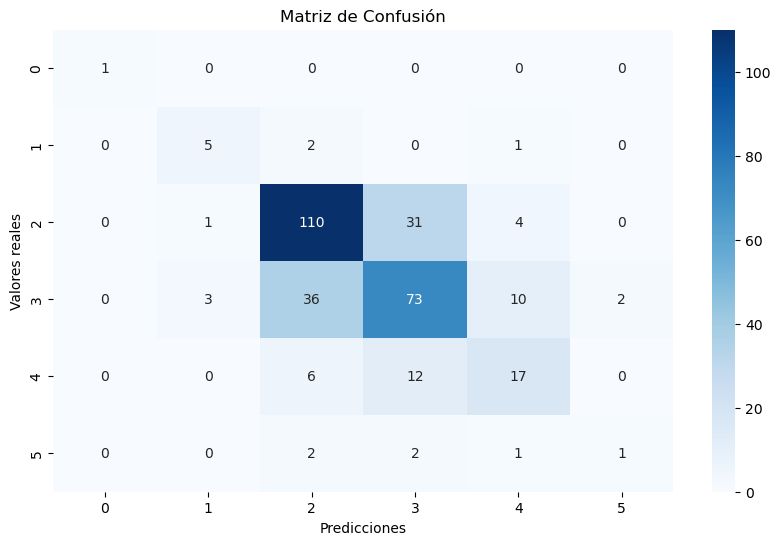


📋 Reporte de clasificación:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1
           4       0.56      0.62      0.59         8
           5       0.71      0.75      0.73       146
           6       0.62      0.59      0.60       124
           7       0.52      0.49      0.50        35
           8       0.33      0.17      0.22         6

    accuracy                           0.65       320
   macro avg       0.62      0.60      0.61       320
weighted avg       0.64      0.65      0.64       320



In [102]:


# 1. Mostrar distribución de clases predichas
unique, counts = np.unique(predicciones, return_counts=True)
print("📊 Distribución de clases predichas:")
for clase, cantidad in zip(unique, counts):
    print(f"Clase {clase}: {cantidad} veces")

# 2. Matriz de confusión
print("\n🧩 Matriz de Confusión:")
conf_matrix = confusion_matrix(y_test, predicciones)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

# 3. Reporte de clasificación
print("\n📋 Reporte de clasificación:")
print(classification_report(y_test, predicciones))


Observamos El modelo predice clase 5 y 6 con mucha frecuencia.

Clase 3 y 8 casi no se predice se prodrina ignorar 

Podría indicar desequilibrio de clases en los datos o que el árbol no logra separar bien esas clases minoritarias.
sobre la metricas se analisa lo siguiente 
Clase 3: Solo tiene una muestra, y la predijo correctamente. Pero esto no es representativo; una sola muestra no permite evaluar rendimiento real.

Clase 5 y 6: Buen rendimiento, especialmente la clase 5.

Clase 8: Muy mal rendimiento. De 6 ejemplos reales, el modelo solo acertó 1 esto indica que no está aprendiendo a reconocer bien esta clase.

Clase 7: Rendimiento regular, podría mejorar.

Accuracy general: 0.6 El modelo acierta 65% de las veces.

No está mal como base, pero hay espacio para mejorar, especialmente en las clases minoritarias.
Podemos decir que hay 
Desequilibrio de clases: Algunas clases están muy poco representadas (ej: clase 3, 4, 8). Esto puede dificultar el aprendizaje del modelo.
vamos a usar técnicas de balanceo como SMOTE, submuestreo o ponderación de clases.

exite poca profundidad o datos confusos: El árbol puede estar demasiado simple las variables no separan bien las clases.
 

debemos Mejorar representación: Explora la importancia de cada variable (.feature_importances_) para ver qué está usando el árbol para decidir.

✅ Nuevas clases tras SMOTE:
quality
3          535
4          535
5          535
6          535
7          535
8          535
Name: count, dtype: int64

📋 Reporte de clasificación (con SMOTE):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.14      0.38      0.21         8
           5       0.71      0.66      0.68       146
           6       0.61      0.52      0.56       124
           7       0.45      0.69      0.55        35
           8       0.33      0.17      0.22         6

    accuracy                           0.59       320
   macro avg       0.37      0.40      0.37       320
weighted avg       0.62      0.59      0.60       320



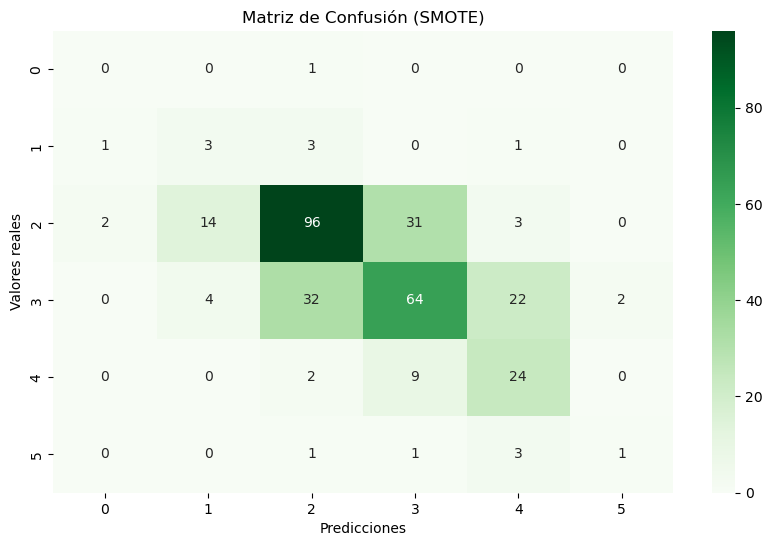

In [109]:


from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#  Aplicar SMOTE a los datos de entrenamiento
smote = SMOTE(random_state=13)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("✅ Nuevas clases tras SMOTE:")
print(y_train_smote.value_counts())

# Entrenamos el árbol con los datos balanceados
tree_smote = DecisionTreeClassifier(random_state=13)
arbol_smote = tree_smote.fit(X_train_smote, y_train_smote)

#  Hacer predicciones
predicciones_smote = arbol_smote.predict(X_test)

# Evaluar el nuevo modelo
print("\n📋 Reporte de clasificación (con SMOTE):")
print(classification_report(y_test, predicciones_smote))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, predicciones_smote)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión (SMOTE)')
plt.show()


con los ajustes mejoramos 
Clase 7: Antes tenía F1-score de 0.50, ahora 0.55 con mejor recall (0.69).

Clase 4: Antes tenía F1-score de 0.59, ahora bajó un poco pero tiene mejor recall (0.38 vs 0.62).

Clase 6 y 5 siguen rindiendo correctamente.
desventajes 
Clase 3: No se predijo correctamente (pero solo hay 1 ejemplo real, así que difícil evaluarlo).

Accuracy general bajó un poco (0.65 → 0.59), pero ahora el modelo intenta predecir más clases.

En Conclusión
Aunque la precisión general bajó un poco, ahora el modelo intenta predecir clases minoritarias como la 7 y 8. Antes casi no lo hacía.

Esto es común al usar SMOTE: se sacrifica algo de precisión en las clases mayoritarias, pero se gana en inclusividad del modelo.



📋 Reporte de clasificación (Random Forest + SMOTE):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.25      0.50      0.33         8
           5       0.77      0.74      0.76       146
           6       0.65      0.57      0.61       124
           7       0.49      0.66      0.56        35
           8       0.20      0.17      0.18         6

    accuracy                           0.65       320
   macro avg       0.39      0.44      0.41       320
weighted avg       0.67      0.65      0.65       320



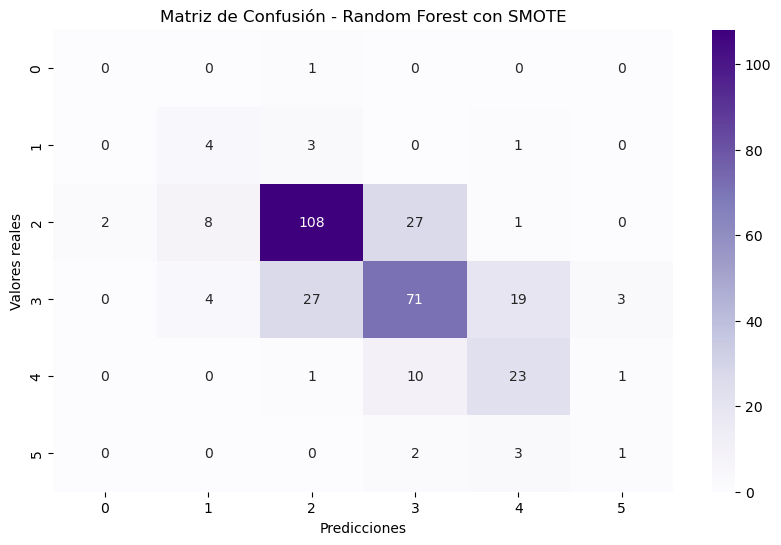

In [110]:
# vamos a tartar de de Probar Random Forest: maneja mejor datos balanceados y puede mejorar aún más los resultados
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# 1. Aplicar SMOTE (de nuevo por si no lo habías guardado)
smote = SMOTE(random_state=13)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train.values.ravel())


# 2. Entrenar modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=13)
rf_model.fit(X_train_smote, y_train_smote)

# 3. Predicciones
rf_predicciones = rf_model.predict(X_test)

# 4. Reporte de clasificación
print("📋 Reporte de clasificación (Random Forest + SMOTE):")
print(classification_report(y_test, rf_predicciones))

# 5. Matriz de confusión
conf_matrix = confusion_matrix(y_test, rf_predicciones)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión - Random Forest con SMOTE')
plt.show()


mejoro  Accuracy general: 0.65 (igual que con árbol sin SMOTE, pero con clases mejor representadas).

Clase 5 y 6, que tienen mayor cantidad de ejemplos, están bien modeladas (F1 altos).

Clase 4 y 7, que antes eran difíciles, ahora tienen mejores F1 y recall.

problemas 
Clase 3: sigue siendo ignorada porque hay solo 1 ejemplo en test. Difícil evaluar realmente.

Clase 8: F1 bajó ligeramente, pero es una clase muy pequeña (6 ejemplos), y el modelo aún no la captura bien.


Aumentamos  la capacidad del modelo para reconocer clases menos frecuentes sin perder accuracy general. También es más robusto frente a ruido y overfitting que un solo árbol.

El modelo optimizado no mejora mucho frente al RF "normal" con SMOTE. Esto es común cuando el modelo ya está rindiendo bien y los datos tienen un límite en su calidad o cantidad.

Clase 3 sigue sin predecirse (solo hay un dato en test).

Las clases minoritarias (como 4 y 8) siguen con desempeño bajo, pero algo mejor que con un árbol de decisión simple.